# Brain Tumor Detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### <b> Load the  Dataset

In [ ]:
!unzip "/content/drive/MyDrive/ML sem-5/archive (1).zip" -d "/content/drive/MyDrive/deep learning lab/"

#### <b> Visualize the  Data

Populating the interactive namespace from numpy and matplotlib


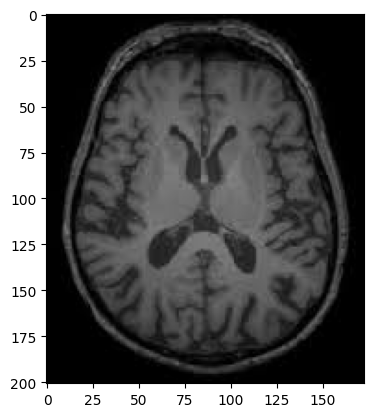

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as img
img=img.imread('/content/drive/MyDrive/deep learning lab/brain_tumor_dataset/no/10 no.jpg')
imgplot = plt.imshow(img)
plt.show()

Populating the interactive namespace from numpy and matplotlib


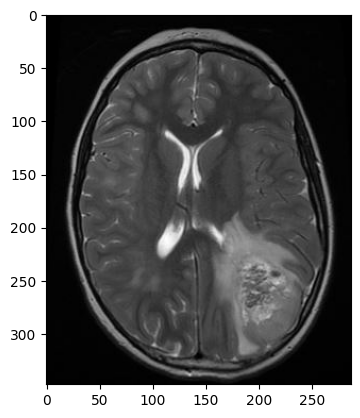

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as img
img=img.imread('/content/drive/MyDrive/deep learning lab/brain_tumor_dataset/yes/Y100.JPG')
imgplot = plt.imshow(img)
plt.show()

##  Import Libraries

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#####Check the TensorFlow version

In [ ]:
print(tensorflow.__version__)

2.15.0


## Designing the Model

In [ ]:
import os

In [ ]:
import os
import cv2

def resize_and_convert_color(input_dir, output_dir, target_size=(224, 224)):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(input_dir):
        if filename.endswith(('.jpg', '.jpeg', '.png')):  # Check if the file is an image
            image_path = os.path.join(input_dir, filename)
            image = cv2.imread(image_path)

            if image is not None:
                # Resize image
                resized_image = cv2.resize(image, target_size)

                # Convert color from BGR to RGB
                rgb_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

                # Save the converted image
                output_path = os.path.join(output_dir, filename)
                cv2.imwrite(output_path, rgb_image)

                print(f"Processed: {filename}")

In [ ]:
# Example usage:
input_directory = "/content/drive/MyDrive/deep learning lab/brain_tumor_dataset/no"
output_directory = "/content/drive/MyDrive/deep learning lab/data/no"
resize_and_convert_color(input_directory, output_directory)

In [ ]:
# Example usage:
input_directory = "/content/drive/MyDrive/deep learning lab/brain_tumor_dataset/yes"
output_directory = "/content/drive/MyDrive/deep learning lab/data/yes"
resize_and_convert_color(input_directory, output_directory)

In [ ]:
# Create train and test folders
output_folder="/content/drive/MyDrive/deep learning lab/data"

train_folder = os.path.join(output_folder, 'train')
test_folder = os.path.join(output_folder, 'test')
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

In [ ]:
classes=["yes","no"]

In [ ]:
path="/content/drive/MyDrive/deep learning lab/data"

In [ ]:
# # Iterate over the classes and split the data
from sklearn.model_selection import train_test_split
import shutil

for class_name in classes:
    class_folder = os.path.join(path, class_name)

    # List all the images in the class folder
    images = os.listdir(class_folder)

    # Split the images into train and test sets
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    # Create class-specific folders in train and test
    train_class_folder = os.path.join(train_folder, class_name)
    test_class_folder = os.path.join(test_folder, class_name)
    os.makedirs(train_class_folder, exist_ok=True)
    os.makedirs(test_class_folder, exist_ok=True)

    # Move images to the respective folders
    for image in train_images:
        src_path = os.path.join(class_folder, image)
        dest_path = os.path.join(train_class_folder, image)
        shutil.copy(src_path, dest_path)

    for image in test_images:
        src_path = os.path.join(class_folder, image)
        dest_path = os.path.join(test_class_folder, image)
        shutil.copy(src_path, dest_path)

print("Dataset split and organized into train and test folders.")

Dataset split and organized into train and test folders.


In [ ]:
IMAGE_SIZE=(224,224)
BATCH_SIZE=32

#### <b> Generate Images to train the model

In [ ]:
train_images="/content/drive/MyDrive/deep learning lab/data/train"
test_images="/content/drive/MyDrive/deep learning lab/data/test"

In [ ]:
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)


test_datagen=ImageDataGenerator (rescale=1. /255)


train_generator =train_datagen.flow_from_directory(train_images,
                                                   target_size =(224,224),
                                                   batch_size=20,
                                                   class_mode='binary',
                                                   classes=['yes','no'])


validation_generator =test_datagen.flow_from_directory(test_images,
                                                       target_size =(224,224),
                                                       batch_size=20,
                                                       classes=['yes','no'],
                                                       class_mode='binary')


Found 286 images belonging to 2 classes.
Found 72 images belonging to 2 classes.


####**Visual Representation of ImageDataGenerator**

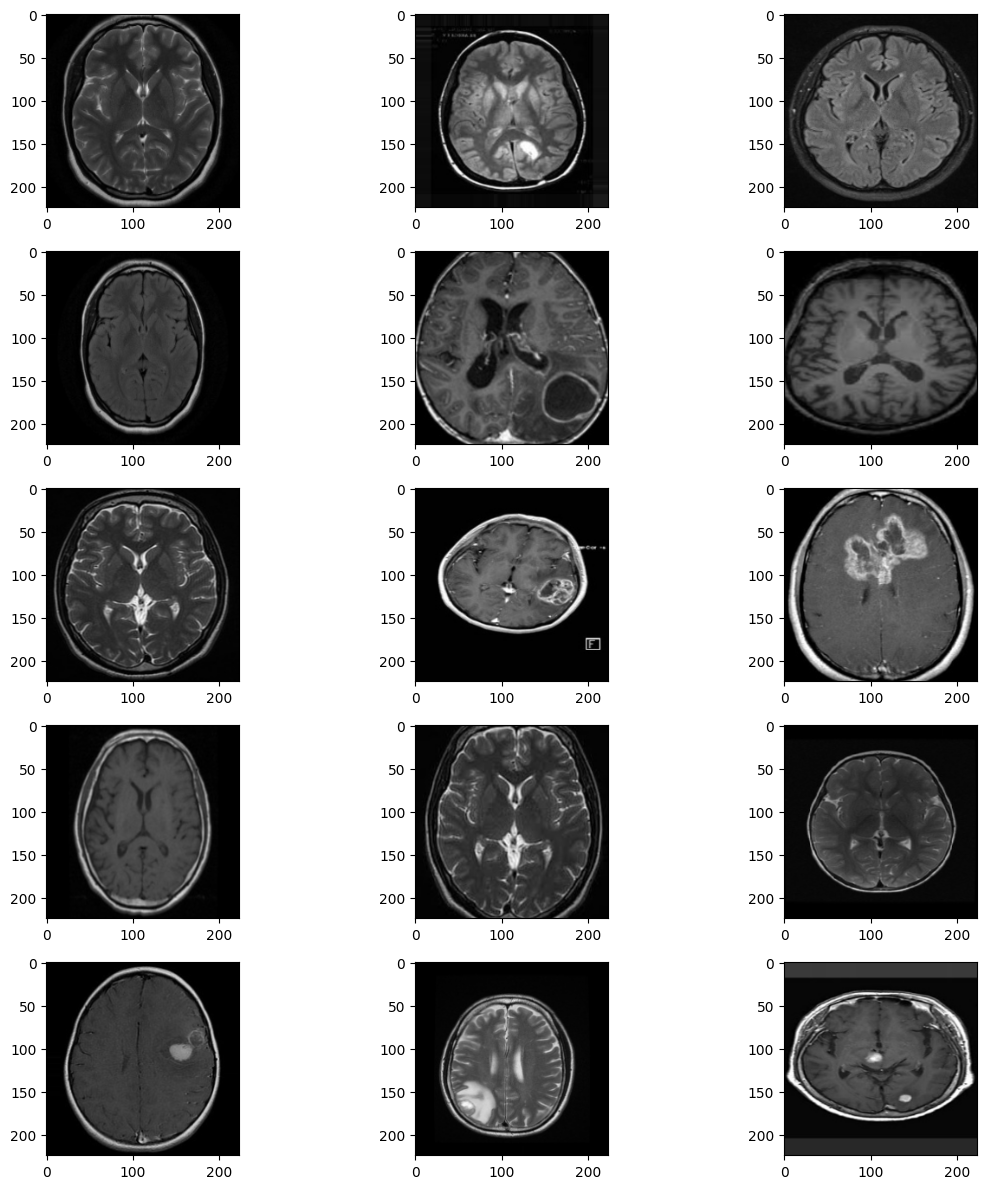

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

### <b> Build the basic CNN model 0

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 26, 26, 128)      

In [ ]:
training=model.fit(train_generator,
          validation_data=validation_generator,
          epochs=20,
          batch_size=32,
          validation_split=0.2)

Epoch 1/20
15/15 [==============================] - 7s 390ms/step - loss: 0.1597 - accuracy: 0.9336 - val_loss: 0.3843 - val_accuracy: 0.8889
Epoch 2/20
15/15 [==============================] - 4s 293ms/step - loss: 0.1146 - accuracy: 0.9580 - val_loss: 0.4143 - val_accuracy: 0.8611
Epoch 3/20
15/15 [==============================] - 6s 402ms/step - loss: 0.1556 - accuracy: 0.9510 - val_loss: 0.4013 - val_accuracy: 0.9028
Epoch 4/20
15/15 [==============================] - 5s 300ms/step - loss: 0.0626 - accuracy: 0.9755 - val_loss: 0.4223 - val_accuracy: 0.8611
Epoch 5/20
15/15 [==============================] - 5s 333ms/step - loss: 0.1106 - accuracy: 0.9510 - val_loss: 0.3896 - val_accuracy: 0.9028
Epoch 6/20
15/15 [==============================] - 6s 386ms/step - loss: 0.1093 - accuracy: 0.9580 - val_loss: 0.5913 - val_accuracy: 0.8889
Epoch 7/20
15/15 [==============================] - 5s 320ms/step - loss: 0.1048 - accuracy: 0.9615 - val_loss: 0.2411 - val_accuracy: 0.8889
Epoch 

#### <b> Find the accuracy score


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


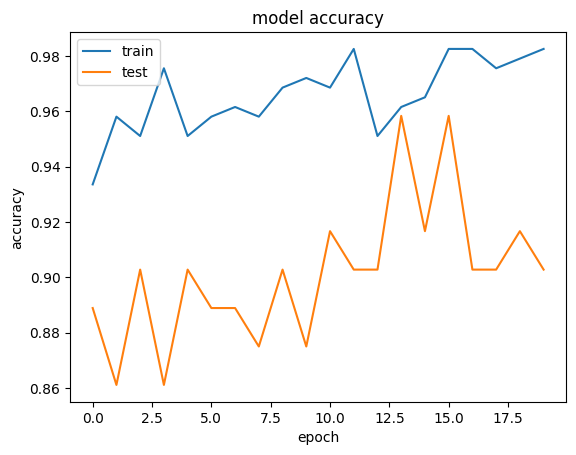

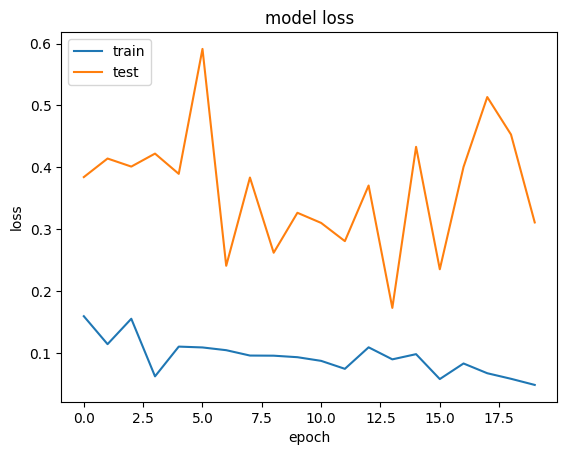

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


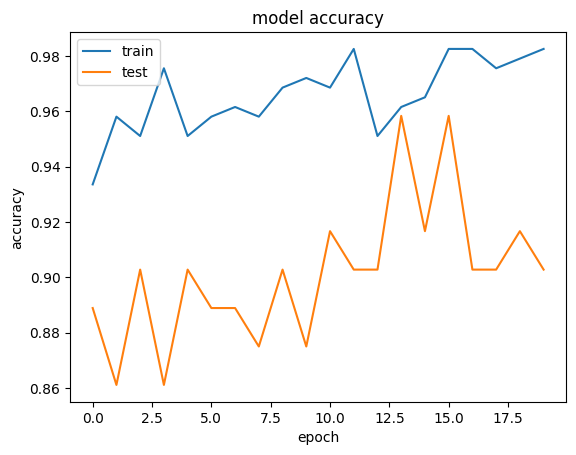

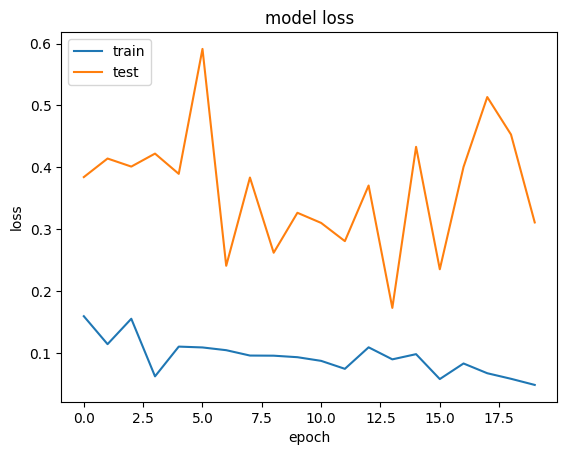

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


1/1 [==============================] - 0s 49ms/step
[[1.]]
Prediction:  no


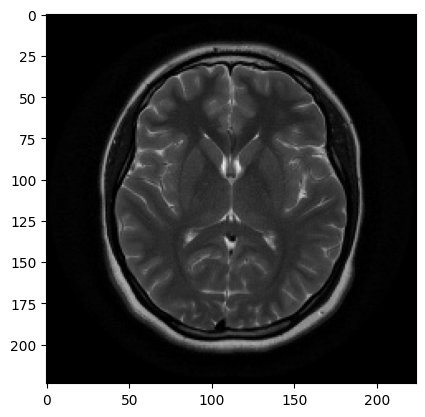

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/drive/MyDrive/deep learning lab/data/no/1 no.jpeg",target_size=(224,224))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="no"
else:
    prediction ="yes"
print('Prediction: ',prediction)

img=mpimg.imread('/content/drive/MyDrive/deep learning lab/data/no/1 no.jpeg')
imgplot = plt.imshow(img)
plt.show()


####<b> Predict the image


1/1 [==============================] - 0s 62ms/step
[[0.]]
Prediction:  yes


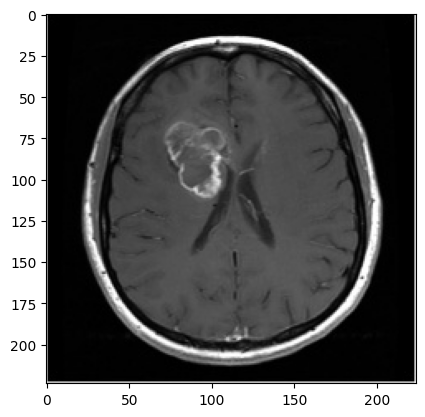

In [ ]:
img_pred = image.load_img("/content/drive/MyDrive/deep learning lab/data/yes/Y101.jpg",target_size=(224,224))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="no"
else:
    prediction ="yes"
print('Prediction: ',prediction)

img=mpimg.imread('/content/drive/MyDrive/deep learning lab/data/yes/Y101.jpg')
imgplot = plt.imshow(img)
plt.show()


### <b> Build the basic CNN model 1

####<b> Let's add add some layers to prevent ovetfitting


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
# ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


callbacks = [earlystop, learning_rate_reduction]

model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dropout(0.5))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='sigmoid'))


#### <b> Compile the basic CNN model1

In [ ]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 26, 26, 128)      

#### <b> Fit the basic CNN model1

In [ ]:
training=model1.fit(train_generator,
          validation_data=validation_generator,
          epochs=20,
          batch_size=32,
          validation_split=0.2)

Epoch 1/20
15/15 [==============================] - 7s 309ms/step - loss: 0.7022 - accuracy: 0.5874 - val_loss: 0.4816 - val_accuracy: 0.7917
Epoch 2/20
15/15 [==============================] - 5s 349ms/step - loss: 0.6400 - accuracy: 0.6434 - val_loss: 0.5117 - val_accuracy: 0.7639
Epoch 3/20
15/15 [==============================] - 4s 285ms/step - loss: 0.5965 - accuracy: 0.6853 - val_loss: 0.5254 - val_accuracy: 0.7500
Epoch 4/20
15/15 [==============================] - 7s 479ms/step - loss: 0.5650 - accuracy: 0.7273 - val_loss: 0.4596 - val_accuracy: 0.8056
Epoch 5/20
15/15 [==============================] - 4s 284ms/step - loss: 0.5798 - accuracy: 0.7063 - val_loss: 0.5434 - val_accuracy: 0.7917
Epoch 6/20
15/15 [==============================] - 5s 349ms/step - loss: 0.5033 - accuracy: 0.7552 - val_loss: 0.4359 - val_accuracy: 0.8333
Epoch 7/20
15/15 [==============================] - 4s 281ms/step - loss: 0.4306 - accuracy: 0.8007 - val_loss: 0.4977 - val_accuracy: 0.8056
Epoch 

#### <b> Find the accuracy score


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


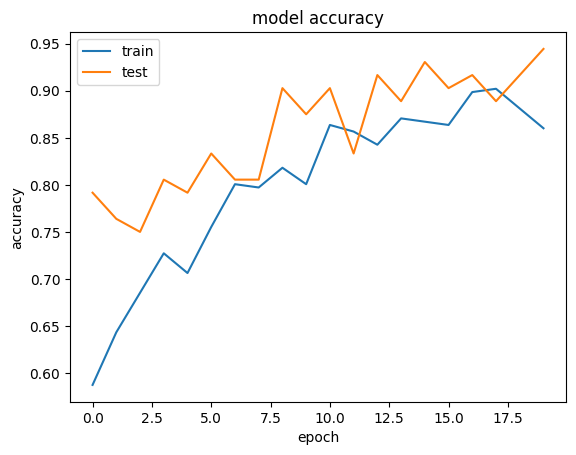

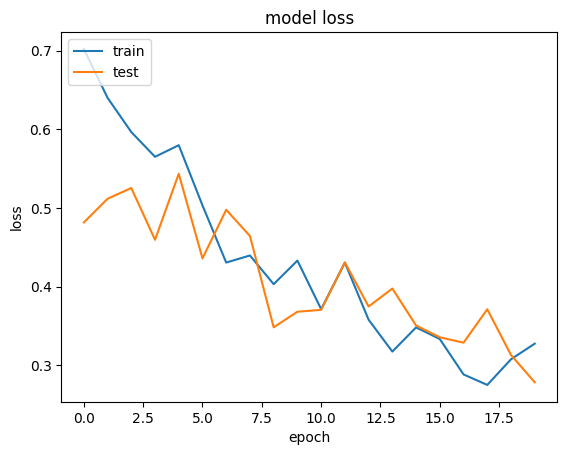

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


1/1 [==============================] - 0s 41ms/step
[[1.]]
Prediction:  no


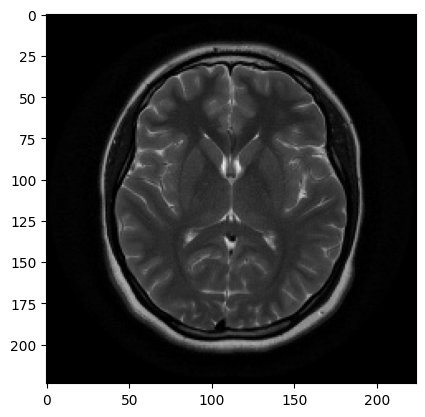

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/drive/MyDrive/deep learning lab/data/no/1 no.jpeg",target_size=(224,224))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="no"
else:
    prediction ="yes"
print('Prediction: ',prediction)

img=mpimg.imread('/content/drive/MyDrive/deep learning lab/data/no/1 no.jpeg')
imgplot = plt.imshow(img)
plt.show()


1/1 [==============================] - 0s 72ms/step
[[0.]]
Prediction:  yes


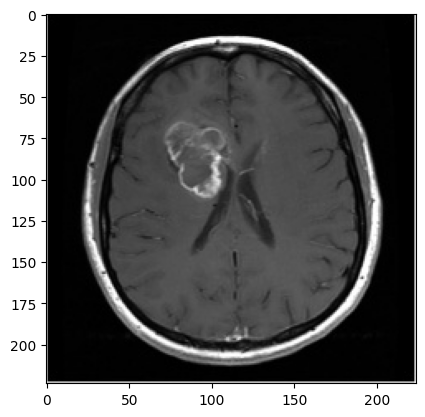

In [ ]:
img_pred = image.load_img("/content/drive/MyDrive/deep learning lab/data/yes/Y101.jpg",target_size=(224,224))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="no"
else:
    prediction ="yes"
print('Prediction: ',prediction)

img=mpimg.imread('/content/drive/MyDrive/deep learning lab/data/yes/Y101.jpg')
imgplot = plt.imshow(img)
plt.show()


### <b> Build the basic CNN model 2

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


callbacks = [earlystop, learning_rate_reduction]

model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))
model2.add(BatchNormalization())

model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))


model2.add(Flatten())
model2.add(Dropout(0.5))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='softmax'))

#### <b> Compile the basic CNN model2

In [ ]:
#model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 dropout_13 (Dropout)        (None, 111, 111, 32)      0         
                                                                 
 conv2d_24 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)    

#### <b> Fit the basic CNN model2

In [ ]:
training=model1.fit(train_generator,
          validation_data=validation_generator,
          epochs=20,
          batch_size=32,
          validation_split=0.2,callbacks=callbacks)

Epoch 1/20
15/15 [==============================] - ETA: 0s - loss: 0.1585 - accuracy: 0.9406

15/15 [==============================] - 4s 298ms/step - loss: 0.1585 - accuracy: 0.9406 - val_loss: 0.2942 - val_accuracy: 0.9444 - lr: 0.0010
Epoch 2/20
15/15 [==============================] - ETA: 0s - loss: 0.0945 - accuracy: 0.9755

15/15 [==============================] - 4s 289ms/step - loss: 0.0945 - accuracy: 0.9755 - val_loss: 0.3736 - val_accuracy: 0.8889 - lr: 0.0010
Epoch 3/20
15/15 [==============================] - ETA: 0s - loss: 0.1047 - accuracy: 0.9476

15/15 [==============================] - 6s 367ms/step - loss: 0.1047 - accuracy: 0.9476 - val_loss: 0.4615 - val_accuracy: 0.8889 - lr: 0.0010
Epoch 4/20
15/15 [==============================] - ETA: 0s - loss: 0.0879 - accuracy: 0.9685

15/15 [==============================] - 4s 290ms/step - loss: 0.0879 - accuracy: 0.9685 - val_loss: 0.4409 - val_accuracy: 0.8889 - lr: 0.0010
Epoch 5/20
15/15 [==============================] - ETA: 0s - loss: 0.0662 - accuracy: 0.9755

15/15 [==============================] - 5s 342ms/step - loss: 0.0662 - accuracy: 0.9755 - val_loss: 0.4534 - val_accuracy: 0.9167 - lr: 0.0010
Epoch 6/20
15/15 [==============================] - ETA: 0s - loss: 0.1117 - accuracy: 0.9685

15/15 [==============================] - 4s 290ms/step - loss: 0.1117 - accuracy: 0.9685 - val_loss: 0.3857 - val_accuracy: 0.8889 - lr: 0.0010
Epoch 7/20
15/15 [==============================] - ETA: 0s - loss: 0.1308 - accuracy: 0.9615

15/15 [==============================] - 5s 383ms/step - loss: 0.1308 - accuracy: 0.9615 - val_loss: 0.2888 - val_accuracy: 0.9444 - lr: 0.0010
Epoch 8/20
15/15 [==============================] - ETA: 0s - loss: 0.0871 - accuracy: 0.9720

15/15 [==============================] - 5s 302ms/step - loss: 0.0871 - accuracy: 0.9720 - val_loss: 0.3262 - val_accuracy: 0.9306 - lr: 0.0010
Epoch 9/20
15/15 [==============================] - ETA: 0s - loss: 0.1284 - accuracy: 0.9580

15/15 [==============================] - 5s 316ms/step - loss: 0.1284 - accuracy: 0.9580 - val_loss: 0.3907 - val_accuracy: 0.8889 - lr: 0.0010
Epoch 10/20
15/15 [==============================] - ETA: 0s - loss: 0.0819 - accuracy: 0.9615

15/15 [==============================] - 5s 328ms/step - loss: 0.0819 - accuracy: 0.9615 - val_loss: 0.3552 - val_accuracy: 0.9722 - lr: 0.0010
Epoch 11/20
15/15 [==============================] - ETA: 0s - loss: 0.1045 - accuracy: 0.9720

15/15 [==============================] - 5s 312ms/step - loss: 0.1045 - accuracy: 0.9720 - val_loss: 0.3413 - val_accuracy: 0.9028 - lr: 0.0010
Epoch 12/20
15/15 [==============================] - ETA: 0s - loss: 0.0789 - accuracy: 0.9685

15/15 [==============================] - 6s 386ms/step - loss: 0.0789 - accuracy: 0.9685 - val_loss: 0.3627 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 13/20
15/15 [==============================] - ETA: 0s - loss: 0.0710 - accuracy: 0.9825

15/15 [==============================] - 4s 289ms/step - loss: 0.0710 - accuracy: 0.9825 - val_loss: 0.3918 - val_accuracy: 0.9722 - lr: 0.0010
Epoch 14/20
15/15 [==============================] - ETA: 0s - loss: 0.0959 - accuracy: 0.9580

15/15 [==============================] - 4s 294ms/step - loss: 0.0959 - accuracy: 0.9580 - val_loss: 0.3962 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 15/20
15/15 [==============================] - ETA: 0s - loss: 0.0849 - accuracy: 0.9720

15/15 [==============================] - 7s 494ms/step - loss: 0.0849 - accuracy: 0.9720 - val_loss: 0.4227 - val_accuracy: 0.9444 - lr: 0.0010
Epoch 16/20
15/15 [==============================] - ETA: 0s - loss: 0.0764 - accuracy: 0.9720

15/15 [==============================] - 5s 288ms/step - loss: 0.0764 - accuracy: 0.9720 - val_loss: 0.4089 - val_accuracy: 0.9722 - lr: 0.0010
Epoch 17/20
15/15 [==============================] - ETA: 0s - loss: 0.0838 - accuracy: 0.9615

15/15 [==============================] - 6s 389ms/step - loss: 0.0838 - accuracy: 0.9615 - val_loss: 0.3446 - val_accuracy: 0.9722 - lr: 0.0010


#### <b> Find the accuracy score


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


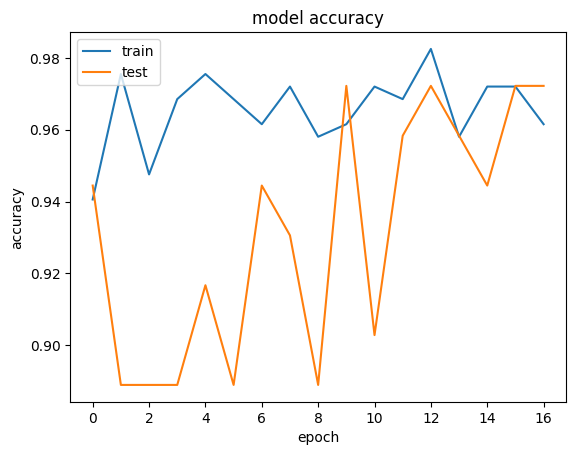

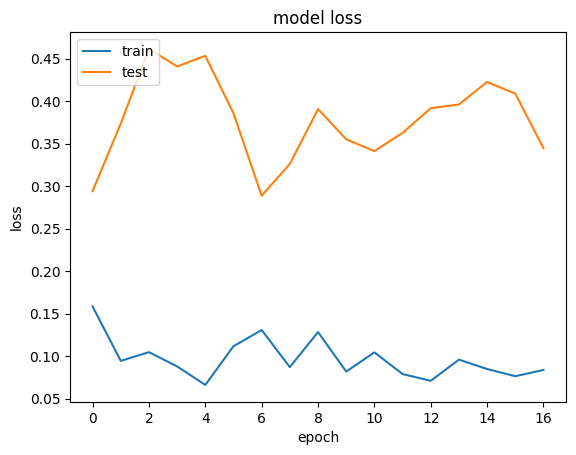

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### <b> Predict the image


1/1 [==============================] - 0s 19ms/step
[[1.]]
Prediction:  no


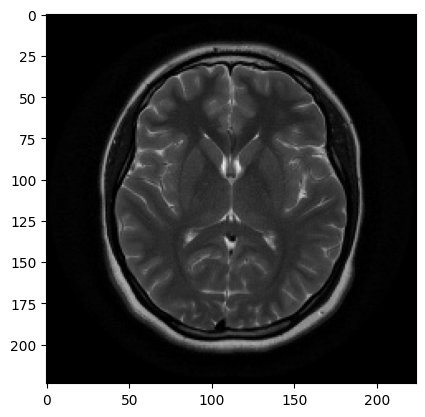

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/drive/MyDrive/deep learning lab/data/no/1 no.jpeg",target_size=(224,224))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="no"
else:
    prediction ="yes"
print('Prediction: ',prediction)

img=mpimg.imread('/content/drive/MyDrive/deep learning lab/data/no/1 no.jpeg')
imgplot = plt.imshow(img)
plt.show()


1/1 [==============================] - 0s 21ms/step
[[0.]]
Prediction:  yes


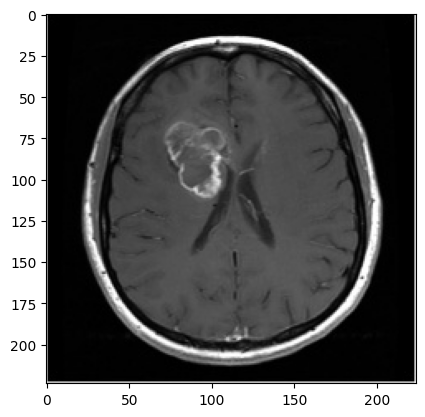

In [ ]:
img_pred = image.load_img("/content/drive/MyDrive/deep learning lab/data/yes/Y101.jpg",target_size=(224,224))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="no"
else:
    prediction ="yes"
print('Prediction: ',prediction)

img=mpimg.imread('/content/drive/MyDrive/deep learning lab/data/yes/Y101.jpg')
imgplot = plt.imshow(img)
plt.show()
